In [31]:
!pip install rasterio

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy.random import randint
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import rasterio
import random
import os


In [14]:
def reject_outliers(s1):
    #p = np.percentile(s1, 99)
    s1 = np.clip(s1, 0.0)

    return s1

def get_s1_image(image_path, normalization):
    '''
        It returns an grayscale image using a path.
    '''
    with rasterio.open(image_path) as src:
        vv = src.read()
        vv = np.moveaxis(vv,0,-1)
    vv = np.clip(vv, 0, 10000)
    print(vv.max())
    print(vv.min())
    vv = (vv - vv.min())/(vv.max() - vv.min())
    return vv


In [15]:
img_original = "this is original img"
img = "this is the img have resize"
vv = get_s1_image(img,"m")
vv_or = get_s1_image(img_original,"m")

0.0110379215
0.0
0.025
0.0


In [40]:

def get_intensity_image(image_path, normalization):
    '''
        return the 
    '''
    with rasterio.open(image_path) as src:
        vv = src.read()
        vv = np.moveaxis(vv,0,-1)
    #vv = np.clip(vv, 0, 1000000)
    #vv = 10 * np.log10(vv)
    #print(vv.max())
    #print(vv.min())
    vv = (vv - vv.min())/(vv.max() - vv.min())
    vv = np.clip(vv, 0.0, 1.0)
    total_sum = np.sum(vv)
    return total_sum

In [39]:
def print_folder_intensities(folder_path, normalization_method):
    """
    Prints the intensity values for all images in a folder.
    Args:
        folder_path (str): Path to the folder containing images.
        normalization_method (str): The normalization method to use.
    """
    # List all files in the folder
    image_files = os.listdir(folder_path)

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        try:
            # Load image and calculate intensities
            intensity = get_intensity_image(image_path, normalization_method)
            print(f"Intensity for {image_file}:")
            print(intensity)
        except Exception as e:
            print(f"Error processing {image_file}: {e}")

# Folder paths
test_ver_02 = "/kaggle/input/dataset-with-hope/new_train_val/train/01_2019_04_original"  # Normalized
test_intensity = "/kaggle/input/gggggggggggggg/01_2020_04_original_2019_04"  # Not normalized

# Print intensities for both folders
print("Intensities for test_ver_02:")
print_folder_intensities(test_ver_02, "minmax")

print("\nIntensities for test_intensity:")
print_folder_intensities(test_intensity, "minmax")


Intensities for test_ver_02:
Intensity for Radar_20190401050000.tif:
941.7987
Intensity for Radar_20190401040000.tif:
861.258
Intensity for Radar_20190401230000.tif:
218.1669
Intensity for Radar_20190401020000.tif:
530.96204
Intensity for Radar_20190401010000.tif:
434.01105
Intensity for Radar_20190401170000.tif:
233.05655
Intensity for Radar_20190401060000.tif:
1161.4396
Intensity for Radar_20190401200000.tif:
154.9252
Intensity for Radar_20190401080000.tif:
947.89966
Intensity for Radar_20190401220000.tif:
208.04634
Intensity for Radar_20190401000000.tif:
433.57928
Intensity for Radar_20190401210000.tif:
161.02568
Intensity for Radar_20190401090000.tif:
788.33234
Intensity for Radar_20190401120000.tif:
103.12281
Intensity for Radar_20190401100000.tif:
329.21063
Intensity for Radar_20190401030000.tif:
670.3875
Intensity for Radar_20190401130000.tif:
99.68135
Intensity for Radar_20190401070000.tif:
1325.1389
Intensity for Radar_20190401140000.tif:
302.5967
Intensity for Radar_201904011

In [32]:
import numpy as np
import os

def calculate_intensity_ratio(folder1, folder2, normalization_method):
    """
    Calculates and prints the ratio of intensities between images in two folders.
    Assumes both folders have images with corresponding file names.

    Args:
        folder1 (str): Path to the first folder of images.
        folder2 (str): Path to the second folder of images.
        normalization_method (str): Normalization method for image loading.
    """
    # List image files in both folders
    images_folder1 = sorted(os.listdir(folder1))
    images_folder2 = sorted(os.listdir(folder2))
    
    # Ensure the folders have the same number of images
    if len(images_folder1) != len(images_folder2):
        print("Warning: The two folders have a different number of images.")

    # Iterate through the images and calculate ratios
    for img1, img2 in zip(images_folder1, images_folder2):
        path1 = os.path.join(folder1, img1)
        path2 = os.path.join(folder2, img2)

        try:
            # Load intensity images
            intensity1 = get_intensity_image(path1, normalization_method)
            intensity2 = get_intensity_image(path2, normalization_method)

            # Compute the ratio (avoid division by zero)
            ratio = np.divide(intensity1, intensity2, out=np.zeros_like(intensity1, dtype=float), where=intensity2 != 0)

            print(f"Ratio of {img1} to {img2}:")
            print(ratio)

        except Exception as e:
            print(f"Error processing {img1} and {img2}: {e}")

# Folder paths
test_ver_02 = "/kaggle/input/dataset-with-hope/new_train_val/train/01_2019_04_original"  # Folder 1
test_intensity = "/kaggle/input/gggggggggggggg/01_2020_04_original_2019_04"  # Folder 2

# Calculate intensity ratios
calculate_intensity_ratio(test_ver_02, test_intensity, "minmax")


Ratio of Radar_20190401000000.tif to Radar_20190401000000.tif:
0.21480228480022134
Ratio of Radar_20190401010000.tif to Radar_20190401010000.tif:
0.29485153262667607
Ratio of Radar_20190401020000.tif to Radar_20190401020000.tif:
0.28669360817386713
Ratio of Radar_20190401030000.tif to Radar_20190401030000.tif:
0.22479582865929174
Ratio of Radar_20190401040000.tif to Radar_20190401040000.tif:
0.1612377201290925
Ratio of Radar_20190401050000.tif to Radar_20190401050000.tif:
0.16048109134162875
Ratio of Radar_20190401060000.tif to Radar_20190401060000.tif:
0.16223039141349888
Ratio of Radar_20190401070000.tif to Radar_20190401070000.tif:
0.22389800706773952
Ratio of Radar_20190401080000.tif to Radar_20190401080000.tif:
0.3690778996555306
Ratio of Radar_20190401090000.tif to Radar_20190401090000.tif:
0.1936030602922775
Ratio of Radar_20190401100000.tif to Radar_20190401100000.tif:
0.36922706890700935
Ratio of Radar_20190401110000.tif to Radar_20190401110000.tif:
0.5484462414915882
Ratio of

In [12]:
def image_generatorLSTM(image_paths, batch_size=16, normalization='minmax', augment=True):
    batch_input = np.zeros((batch_size, 11, 256, 256, 1))
    batch_output = np.zeros((batch_size, 256, 256, 1))

    if augment:
        aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

    listdir = sorted(os.listdir(image_paths))  # Sort the sequence folders for deterministic order
    num_sequences = len(listdir)
    current_index = 0  # Start from the first sequence

    while True:
        for i in range(batch_size):
            # Select the sequence folder in order
            seq_folder = os.path.join(image_paths, listdir[current_index])
            current_index += 1
            
            # Reset to the beginning if all sequences are exhausted
            if current_index >= num_sequences:
                current_index = 0

            frames = sorted(os.listdir(seq_folder))  # List all frames in the sequence
            
            # Random start index for 11 input frames + 1 output frame
            start_idx = randint(0, len(frames) - 12)

            if augment:
                transform = aug.get_random_transform(img_shape=(256, 256, 1))

            print(f"Sequence: {seq_folder}")
            print("Input frames:")
            # Input frames
            for j in range(11): 
                frame_path = os.path.join(seq_folder, frames[start_idx + j])
                print(f"  Input frame {j+1}: {frame_path}")  # Print each input frame path
                s2 = get_s1_image(frame_path, normalization)
                if augment:
                    s2 = aug.apply_transform(s2, transform)
                batch_input[i, j, :s2.shape[0], :s2.shape[1], ...] = s2

            # Output frame
            frame_path = os.path.join(seq_folder, frames[start_idx + 11])
            print(f"Output frame: {frame_path}")  # Print the output frame path
            s2 = get_s1_image(frame_path, normalization)
            if augment:
                s2 = aug.apply_transform(s2, transform)
            batch_output[i, :s2.shape[0], :s2.shape[1], ...] = s2

        yield batch_input, batch_output


In [13]:
from tensorflow.keras.layers import Input, ConvLSTM2D, BatchNormalization, Conv2D, MaxPooling3D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf

class convLSTM:
    def __init__(self, len_series=10, img_shape = (256,256,1)):
        self.len_series = len_series
        self.img_shape = img_shape
    
        self.optimizer = Adam(learning_rate=0.0002)
        self.loss = tf.keras.losses.Huber() #huber_loss
        self.metrics = ['mae', 'mse']

        self.model = self.__build()
        self.model.compile(optimizer = self.optimizer, loss = self.loss, metrics = self.metrics)


    def __build(self):
        input_layer = Input(
                shape=(self.len_series, self.img_shape[0], self.img_shape[1], self.img_shape[2])
                )
        # ConvLSTM 1
        x = ConvLSTM2D(filters=64, 
                        kernel_size=(3, 3),
                        activation='relu',
                        padding='same',
                        return_sequences=True)(input_layer)
        x = BatchNormalization()(x)
        # ConvLSTM 2
        x = ConvLSTM2D(filters=32, 
                        kernel_size=(3, 3),
                        activation='relu',
                        padding='same',
                        return_sequences=True)(x)
        x = BatchNormalization()(x)
        # ConvLSTM 3
        x = ConvLSTM2D(filters=32, 
                        kernel_size=(3, 3),
                        activation='relu',
                        padding='same',
                        return_sequences=False)(x)
        # Final Layer
        x = Conv2D(filters=1, kernel_size=(3,3), activation="sigmoid", padding="same")(x)
        # Model
        model = Model(inputs=input_layer, outputs=x)
        return model

    def train(self, epochs, training_series, validation_series, batch_size):
        traingen = image_generatorLSTM(training_series, batch_size =batch_size , normalization='minmax', augment=True)
        valgen   = image_generatorLSTM(validation_series, batch_size = batch_size, normalization='minmax', augment=False)

        es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
        num_training_sequences = len(os.listdir(training_series))
        num_validation_sequences = len(os.listdir(validation_series))
        history = self.model.fit(
            traingen,
            steps_per_epoch = num_training_sequences//batch_size,
            validation_data = valgen,
            validation_steps = num_validation_sequences//batch_size,
            epochs = epochs,
            callbacks=[es]
        )
        return history

Metric

In [14]:
training_series = "/kaggle/input/dataset-with-hope/new_train_val/train"
validation_series = "/kaggle/input/dataset-with-hope/new_train_val/val"
lstm = convLSTM(len_series = 11, img_shape =(256,256,1) )
models = lstm.train(epochs = 1,training_series = training_series,validation_series=validation_series,batch_size = 4)
lstm.model.save(os.path.join('weights', 'lstm.h5'))

Sequence: /kaggle/input/dataset-with-hope/new_train_val/train/01_2019_04_original
Input frames:
  Input frame 1: /kaggle/input/dataset-with-hope/new_train_val/train/01_2019_04_original/Radar_20190401060000.tif
  Input frame 2: /kaggle/input/dataset-with-hope/new_train_val/train/01_2019_04_original/Radar_20190401070000.tif
  Input frame 3: /kaggle/input/dataset-with-hope/new_train_val/train/01_2019_04_original/Radar_20190401080000.tif
  Input frame 4: /kaggle/input/dataset-with-hope/new_train_val/train/01_2019_04_original/Radar_20190401090000.tif
  Input frame 5: /kaggle/input/dataset-with-hope/new_train_val/train/01_2019_04_original/Radar_20190401100000.tif
  Input frame 6: /kaggle/input/dataset-with-hope/new_train_val/train/01_2019_04_original/Radar_20190401110000.tif
  Input frame 7: /kaggle/input/dataset-with-hope/new_train_val/train/01_2019_04_original/Radar_20190401120000.tif
  Input frame 8: /kaggle/input/dataset-with-hope/new_train_val/train/01_2019_04_original/Radar_20190401130

In [31]:
lstm.model.save(os.path.join('weights', 'lstm.h5'))

In [42]:
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "/kaggle/working/weights/lstm.h5"
trained_model = load_model(model_path)
trained_model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 11, 256, 256,   │             0 │
│                                 │ 1)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_21 (ConvLSTM2D)     │ (None, 11, 256, 256,   │       150,016 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 11, 256, 256,   │           256 │
│ (BatchNormalization)            │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_22 (ConvLSTM2D)     │ (None, 11, 256, 256,   │       110,720 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 11, 256, 256,   │           128 │
│ (BatchNormalization)            │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_23 (ConvLSTM2D)     │ (None, 256, 256, 32)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 256, 256, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,267 (1.28 MB)

 Trainable params: 335,073 (1.28 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)

# Convert to rainfall rate

In [40]:
import numpy as np

def calculate_R(Z):
    """
    Calculate R based on the formula: Z = 10 * log(a) + 10 * b * log(R).
    
    Parameters:
    Z (numpy.ndarray): The image (2D array) with size 256x256.
    a (float): Constant 'a'.
    b (float): Constant 'b'.
    
    Returns:
    numpy.ndarray: The calculated R values, same shape as Z.
    """
    a = 118.239 
    b = 1.5241 
    # Convert inputs to logarithmic space and solve for R
    log_a = np.log10(a)
    R = 10 ** ((Z - 10 * log_a) / (10 * b))
    sum_R = R.sum()
    return sum_R

# Example usage:
# Assuming Z is a 256x256 NumPy array (replace with actual image data)
Z = np.random.random((256, 256)) * 100  # Example Z image with random values



In [34]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

test_dir = "/kaggle/input/dataset-with-hope/new_train_val/train/05_2020_4_original"
list_image = os.listdir(test_dir)
stacked_data = []
output_npy_file = "stacked_images.npy"
for img in list_image:
    img_dir = os.path.join(test_dir,img)
    #with rasterio.open(img_dir) as src:
    #    vv = src.read()
    #   vv = np.moveaxis(vv,0,-1)
    vv = get_s1_image(img_dir,'minmax')
    stacked_data.append(vv)
stacked_array = np.stack(stacked_data)  # Shape: (num_images, 256, 256, 1)
#np.save(output_npy_file, stacked_array)

# Load a test sequence (example: numpy array of shape (1, len_series, 256, 256, 1))
# Replace with your test data
#test_sequence = np.load("/kaggle/working/stacked_images.npy")  # Shape: (1, len_series, 256, 256, 1)
print(stacked_array.shape)

(24, 256, 256, 1)


In [35]:
stacked_array = stacked_array[:11]
stacked_array = np.expand_dims(stacked_array, axis=0)  # Add batch dimension: (1, 11, 256, 256)
#stacked_array = np.expand_dims(stacked_array, axis=-1)  # Add channel dimension: (1, 11, 256, 256, 1)


In [37]:
# Predict the next frame(s)
predicted_frame = trained_model.predict(stacked_array)  # Output shape: (batch_size, 1, 256, 256, 1)

# Remove batch and sequence dimensions for visualization
predicted_frame = np.squeeze(predicted_frame)  # Shape: (256, 256)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


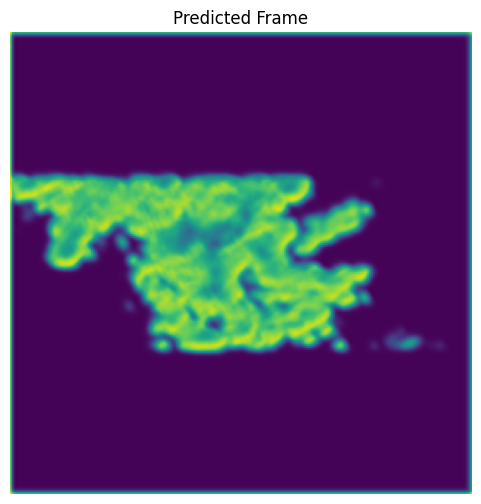

In [38]:
# Visualize the predicted frame
plt.figure(figsize=(6, 6))
plt.imshow(predicted_frame)
plt.title("Predicted Frame")
plt.axis('off')
plt.show()


In [16]:
print(clone_test.shape)

NameError: name 'clone_test' is not defined

In [15]:
# Load the ground truth frame (example)
ground_truth_frame = np.squeeze(clone_test[14, :, :, :])  # Last frame in the input sequence

# Visualize side-by-side
plt.figure(figsize=(12, 6))

# Ground truth
plt.subplot(1, 2, 1)
plt.imshow(ground_truth_frame, cmap='gray')
plt.title("Ground Truth Frame")
plt.axis('off')

# Predicted frame
plt.subplot(1, 2, 2)
plt.imshow(predicted_frame, cmap='gray')
plt.title("Predicted Frame")
plt.axis('off')

plt.show()


NameError: name 'clone_test' is not defined

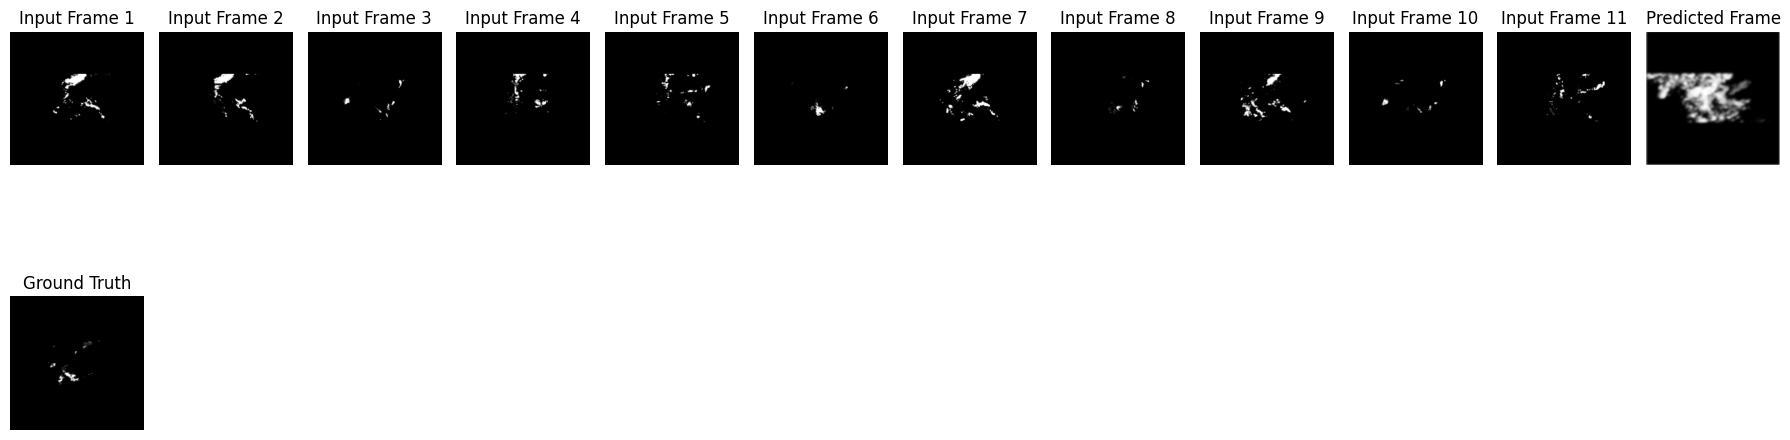

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Assume clone_test contains the sequence of frames and predicted_frame is the last frame
# Ground truth is the last frame in the input sequence
ground_truth_frame = np.squeeze(clone_test[14, :, :, :])  # Last frame in the input sequence

# Visualize side-by-side all frames in the sequence
plt.figure(figsize=(18, 6))

# Plot the input frames (11 frames)
for i in range(11):
    plt.subplot(2, 12, i + 1)  # 2 rows, 12 columns
    input_frame = np.squeeze(clone_test[i, :, :, :])  # Get the input frame
    plt.imshow(input_frame, cmap='gray')
    plt.title(f"Input Frame {i+1}")
    plt.axis('off')

# Plot the predicted frame (12th frame)
plt.subplot(2, 12, 12)  # Last frame of the sequence
plt.imshow(predicted_frame, cmap='gray')
plt.title("Predicted Frame")
plt.axis('off')

# Ground truth frame
plt.subplot(2, 12, 13)  # Ground truth frame position
plt.imshow(ground_truth_frame, cmap='gray')
plt.title("Ground Truth")
plt.axis('off')

plt.tight_layout()
plt.show()


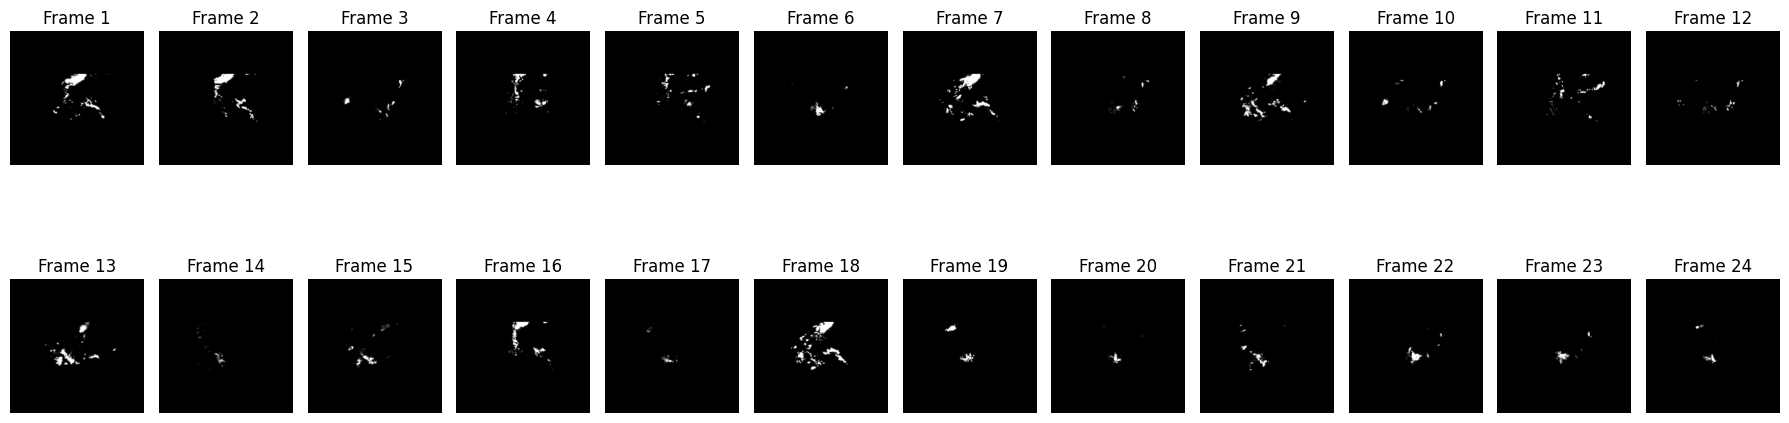

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `clone_test` is a numpy array with shape (24, 256, 256, 1)
# Squeeze the singleton dimension for each frame
clone_test = np.squeeze(clone_test)  # Shape: (24, 256, 256)

# Visualize all 24 frames in a single plot
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

# Loop through all frames in the sequence
for i in range(24):
    plt.subplot(2, 12, i + 1)  # 2 rows, 12 columns (for 24 frames)
    frame = clone_test[i, :, :]  # Get the ith frame (Shape: 256x256)
    plt.imshow(frame, cmap='gray')  # Display the frame
    plt.title(f"Frame {i + 1}")  # Title for each frame
    plt.axis('off')  # Turn off axes

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [6]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray[:,:,np.newaxis]

def image_generatorCycleGAN(s2_paths, s1_paths, batch_size = 16, normalization='minmax', augment = True):

    batch_s2  = np.ones((batch_size, 256, 256, 3))
    batch_s1  = np.ones((batch_size, 256, 256, 3))

    #print('Data Augmentation: {}'.format(augment))
    if augment:
        aug = ImageDataGenerator(
            horizontal_flip=True,
            vertical_flip=True)

    while True:
        for i in range(0, int(batch_size)):

            batch_index = randint(0, high=int(len(s2_paths)/4))*4
            if augment:
                transform = aug.get_random_transform(img_shape = (256,256,1))

            s2 = get_s2_image(s2_paths[batch_index+3], normalization)
            #s1 = rgb2gray(s2)
            s1 = get_s1_image(s1_paths[batch_index+2], normalization)

            if augment:
                s2 = aug.apply_transform(s2, transform)
                s1 = aug.apply_transform(s1, transform)

           # s2 = tf.cast(s2, dtype=tf.float32)
           # s1 = tf.cast(s1, dtype=tf.float32)
            s2 = (2*s2) - 1.0
            s1 = (2*s1) - 1.0

            batch_s2[i,:s2.shape[0],:s2.shape[1],...] = s2
            batch_s1[i,:s1.shape[0],:s1.shape[1],0] = s1[...,0]
            batch_s1[i,:s1.shape[0],:s1.shape[1],1] = s1[...,0]
            batch_s1[i,:s1.shape[0],:s1.shape[1],2] = s1[...,0]
       

        yield batch_s2, batch_s1

def image_generatorHEAD(series, lstm, gan, batch_size = 16, normalization='minmax', augment = True):
    s2_paths = series[0]
    s1_paths = series[1]
    batch_input  = np.zeros((batch_size,256,256, 6))
    batch_output  = np.zeros((batch_size,256,256, 3))

    while True:
        for i in range(0, int(batch_size)):
            batch_index = randint(0, high=int(len(s2_paths)/4))*4

            batch_s2  = np.zeros((1, 3,256,256,3))
            batch_s1  = np.zeros((1, 256,256,3))

            for j in range(4):
                s2 = get_s2_image(s2_paths[batch_index+j], normalization)
                
                if j==3:
                    batch_output[i,:s2.shape[0],:s2.shape[1],...] = s2
                    s1 = get_s1_image(s1_paths[batch_index+j], normalization)
                    s1 = (2*s1) - 1.0
                    batch_s1[0, :s1.shape[0], :s1.shape[1], 0] = s1[...,0]
                    batch_s1[0, :s1.shape[0], :s1.shape[1], 1] = s1[...,0]
                    batch_s1[0, :s1.shape[0], :s1.shape[1], 1] = s1[...,0]
                else:
                    batch_s2[0, j, :s2.shape[0], :s2.shape[1],...] = s2

            lstm_o = lstm.predict(batch_s2)
            gan_o  = gan.predict(batch_s1)

            batch_input[i,:,:,:3] = lstm_o[0,-1,...,]
            batch_input[i,:,:,3:] = gan_o[0,...,]

        yield batch_input, batch_output

In [8]:
img_dir = "/kaggle/input/test-with-dif-tif/31UDQ_2019_S6_train_00.tif"
get_s2_image(img_dir,'minmax')

array([[[0.39017825, 0.17062779, 0.16687381],
        [0.39872421, 0.16638887, 0.12024469],
        [0.40991141, 0.15979386, 0.12634865],
        ...,
        [0.42686506, 0.15391255, 0.12803679],
        [0.37862302, 0.15574252, 0.18253326],
        [0.37615053, 0.16664506, 0.179953  ]],

       [[0.39320279, 0.17092007, 0.19406867],
        [0.42058318, 0.15988994, 0.14150943],
        [0.41440704, 0.14855074, 0.11709968],
        ...,
        [0.36615788, 0.16026051, 0.18056502],
        [0.37055693, 0.16183428, 0.18738826],
        [0.3769669 , 0.16400686, 0.17918645]],

       [[0.39023112, 0.1665129 , 0.19406867],
        [0.41535659, 0.15094749, 0.13902626],
        [0.43183444, 0.16054822, 0.16312237],
        ...,
        [0.35609611, 0.15125249, 0.18824784],
        [0.38217214, 0.17273784, 0.17528912],
        [0.3856562 , 0.18343553, 0.18615812]],

       ...,

       [[0.39682917, 0.16218807, 0.1492929 ],
        [0.41154009, 0.16108958, 0.19406867],
        [0.41144757, 0

Image Radar_20201005000000.tif: Height=256, Width=256
Image Radar_20201005010000.tif: Height=256, Width=256
Image Radar_20201005020000.tif: Height=256, Width=256
Image Radar_20201005030000.tif: Height=256, Width=256
Image Radar_20201005040000.tif: Height=256, Width=256
Image Radar_20201005050000.tif: Height=256, Width=256
Image Radar_20201005060000.tif: Height=256, Width=256
Image Radar_20201005070000.tif: Height=256, Width=256
Image Radar_20201005080000.tif: Height=256, Width=256
Image Radar_20201005090000.tif: Height=256, Width=256
Image Radar_20201005100000.tif: Height=256, Width=256
Image Radar_20201005110000.tif: Height=256, Width=256
Image Radar_20201005120000.tif: Height=256, Width=256
Image Radar_20201005130000.tif: Height=256, Width=256
Image Radar_20201005140000.tif: Height=256, Width=256
Image Radar_20201005150000.tif: Height=256, Width=256
Image Radar_20201005160000.tif: Height=256, Width=256
Image Radar_20201005170000.tif: Height=256, Width=256
Image Radar_20201005180000.t

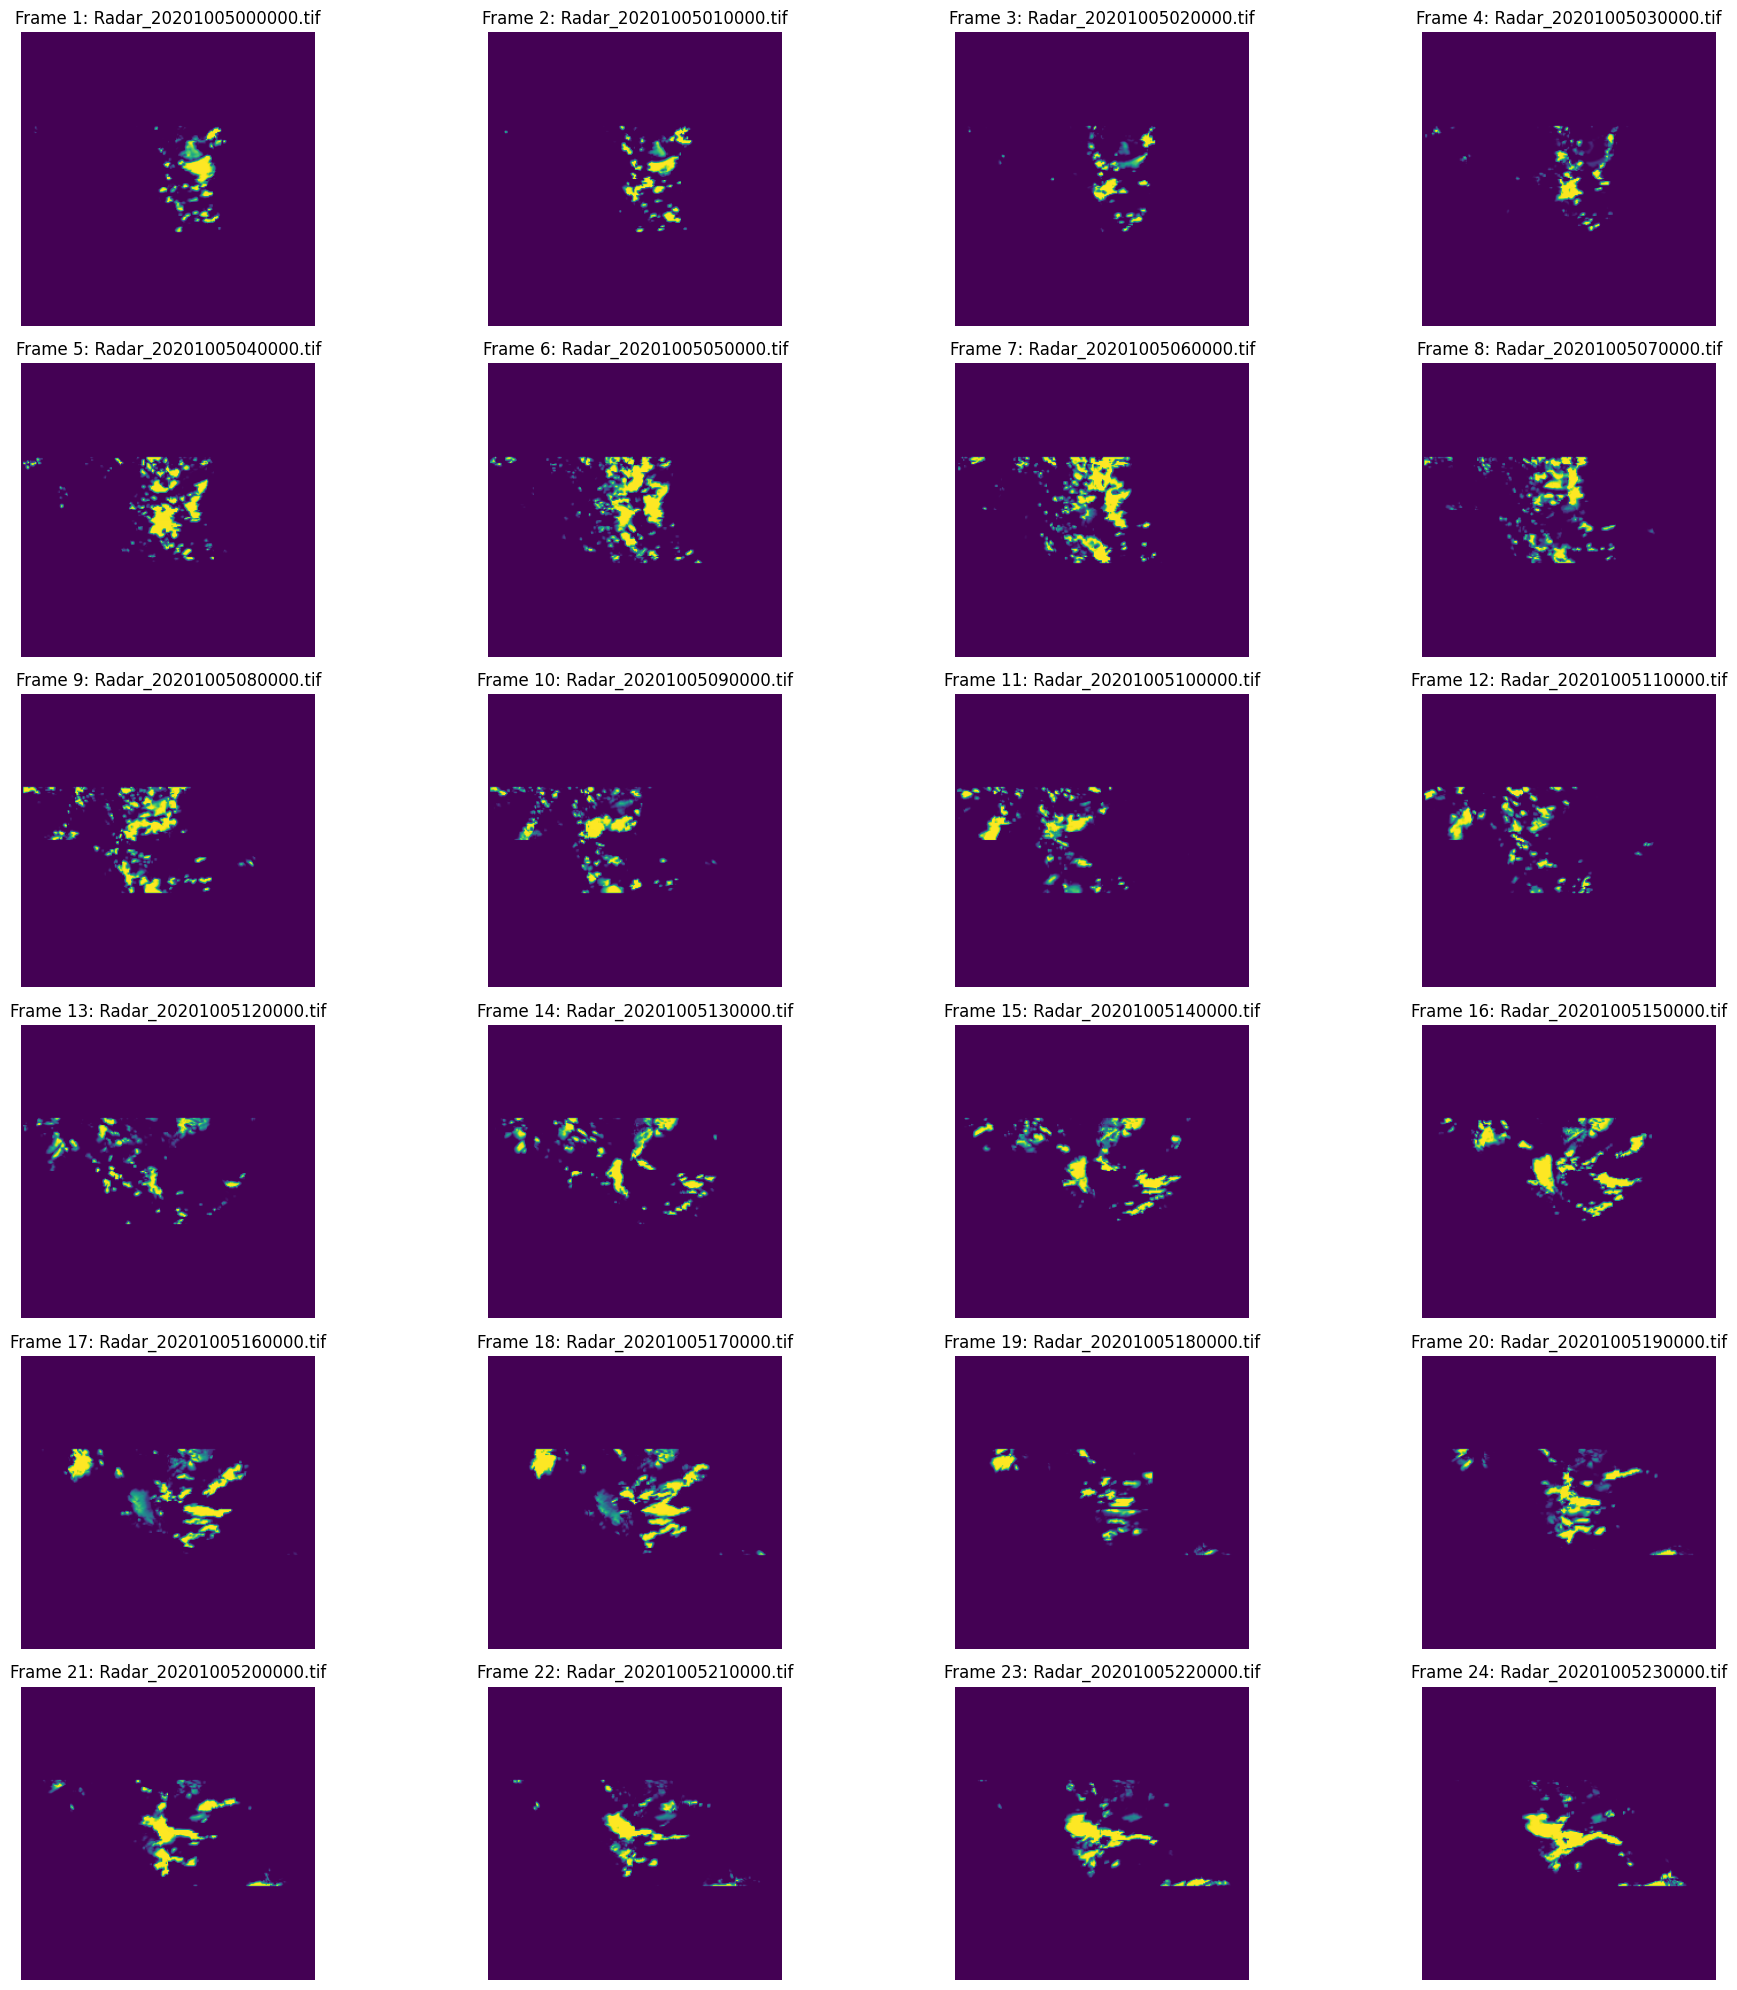

In [122]:
import os
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

# Define the directory containing the images
test_dir = "/kaggle/input/dataset-with-hope/new_train_val/train/05_2020_4_original"
list_image = os.listdir(test_dir)

# Ensure the list of images has exactly 24 frames
list_image = sorted(list_image)  # Sort the images to ensure they are displayed in the correct order
assert len(list_image) == 24, f"Expected 24 images, but found {len(list_image)}"

# Initialize the plot with a larger figure to fit all images (adjusted for 256x256 images)
fig, axes = plt.subplots(6, 4, figsize=(20, 20))  # Create the axes explicitly (6 rows, 4 columns)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over all images in the directory
for i, img_name in enumerate(list_image):
    img_path = os.path.join(test_dir, img_name)
    
    # Open the image using rasterio
    with rasterio.open(img_path) as img:
        # Print image dimensions (height and width)
        print(f"Image {img_name}: Height={img.height}, Width={img.width}")
        
        # Display each image in the corresponding subplot
        ax = axes[i]
        show(img, ax=ax)  # Display the image on the corresponding axis
        ax.set_title(f"Frame {i + 1}: {img_name}")
        ax.axis('off')  # Hide axis for better visualization

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


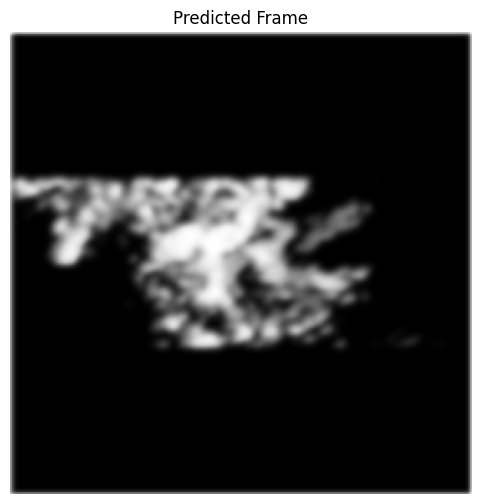

In [124]:
# Visualize the predicted frame
plt.figure(figsize=(6, 6))
plt.imshow(predicted_frame,'gray')
plt.title("Predicted Frame")
plt.axis('off')
plt.show()


# Score

In [ ]:
def shifted_rmse(image1, image2, distance, shift):
    pos_list = (np.arange(1, shift+1).tolist())
    neg_list = [ -x for x in pos_list]
    zero_list = [0]
    x_shift_list = zero_list + pos_list + neg_list
    y_shift_list = zero_list + pos_list + neg_list

    xy_dimension = 256
    xy_dimension_reduction = 256-(distance*2)
    new_im1 = np.zeros((xy_dimension_reduction,xy_dimension_reduction,3))
    new_im2 = np.zeros((xy_dimension_reduction,xy_dimension_reduction,3))

    #Image reduction, boundaries are not taken into account
    for i in range(xy_dimension_reduction):
        for j in range(xy_dimension_reduction):
            new_im1[i][j] = image1[i+distance][j+distance]
            new_im2[i][j] = image2[i+distance][j+distance]
 
    rmse1 = rmse(new_im1, new_im2)
    #print("First RMSE chosen.")
 
    #Check of shifted images
    for elemx in x_shift_list:
        for elemy in y_shift_list:
            shifted_image = np.zeros((xy_dimension,xy_dimension,3))
            new_shifted_image = np.zeros((xy_dimension_reduction,xy_dimension_reduction,3))
            for i in range(xy_dimension):
                for j in range(xy_dimension):
                    if ((i+elemx) < 0) or ((i+elemx) > xy_dimension-1):
                        shifted_image[i][j] = 0.0
                    else:
                        if ((j+elemy) < 0) or ((j+elemy) > xy_dimension-1):
                            shifted_image[i][j] = 0.0
                        else:
                            shifted_image[i][j] = image2[i+elemx][j+elemy]
            for i in range(xy_dimension_reduction):
                for j in range(xy_dimension_reduction):
                    new_shifted_image[i][j] = shifted_image[i+distance][j+distance]
            rmse_shift = rmse(new_im1, new_shifted_image)

            #Choose the lowest rmse
            if rmse_shift < rmse1:
                #print("RMSE with value x = " + str(elemx) + " and value y = " + str(elemy) + " chosen.")
                rmse1 = rmse_shift

    return rmse1


In [47]:
def score_metric(test_dir):
    list_sequence = os.listdir(test_dir)
    #print(list_sequence)
    count = 0
    max = -1
    min = 1000000
    for sequence in list_sequence:
        seq_dir = os.path.join(test_dir,sequence)
        #print(seq_dir)
        stack_sequence = []
        for img in sorted(os.listdir(seq_dir)):
            #print(img)
            img_dir = os.path.join(seq_dir,img)
            #print(img_dir)
            with rasterio.open(img_dir) as src:
                vv = src.read()
                vv = np.moveaxis(vv,0,-1)
                #print(vv.max())
                #print(vv.min())
                vv = np.clip(vv, 0, 10000)
                vv = np.nan_to_num(vv, nan=0)
                #print(vv.max())
                #print(vv.min())
                R = calculate_R(vv)
                if R > max:
                    max = R
                elif  R < min:
                    min = R
                stack_sequence.append(vv) 
        stacked_array = np.stack(stack_sequence)  # Shape: (24, 256, 256, 1)
        window_size = 11
        start_index = 0
        end_index = 12
        #print(min)
        #print(max)
        for i in range(start_index, end_index + 1):
            sub_sequence = np.copy(stacked_array[i:window_size+i])
            #print(sub_sequence.shape)
            #predicted_frame = trained_model.predict(sub_sequence)
    print(min)
    print(max)
            
test_dir = "/kaggle/input/not-normalize-tif/train_val_not_normalize/train"
score_metric(test_dir)
    

Radar_20191017120000.tif
Radar_20191017130000.tif
Radar_20191017140000.tif
Radar_20191017150000.tif
Radar_20191017160000.tif
Radar_20191017170000.tif
Radar_20191017180000.tif
Radar_20191017190000.tif
Radar_20191017200000.tif
Radar_20191017210000.tif
Radar_20191017220000.tif
Radar_20191017230000.tif
Radar_20191018000000.tif
Radar_20191018010000.tif
Radar_20191018020000.tif
Radar_20191018030000.tif
Radar_20191018040000.tif
Radar_20191018050000.tif
Radar_20191018060000.tif
Radar_20191018070000.tif
Radar_20191018080000.tif
Radar_20191018090000.tif
Radar_20191018100000.tif
Radar_20191018110000.tif
Radar_20201022120000.tif
Radar_20201022130000.tif
Radar_20201022140000.tif
Radar_20201022150000.tif
Radar_20201022160000.tif
Radar_20201022170000.tif
Radar_20201022180000.tif
Radar_20201022190000.tif
Radar_20201022200000.tif
Radar_20201022210000.tif
Radar_20201022220000.tif
Radar_20201022230000.tif
Radar_20201023000000.tif
Radar_20201023010000.tif
Radar_20201023020000.tif
Radar_20201023030000.tif


/tmp/ipykernel_30/1953895750.py:19: RuntimeWarning: overflow encountered in power
  R = 10 ** ((Z - 10 * log_a) / (10 * b))


Radar_20201007010000.tif
Radar_20201007020000.tif
Radar_20201007030000.tif
Radar_20201007040000.tif
Radar_20201007050000.tif
Radar_20201007060000.tif
Radar_20201007070000.tif
Radar_20201007080000.tif
Radar_20201007090000.tif
Radar_20201007100000.tif
Radar_20201007110000.tif
Radar_20201007120000.tif
Radar_20201007130000.tif
Radar_20201007140000.tif
Radar_20201007150000.tif
Radar_20201007160000.tif
Radar_20201007170000.tif
Radar_20201007180000.tif
Radar_20201007190000.tif
Radar_20201007200000.tif
Radar_20201007210000.tif
Radar_20201007220000.tif
Radar_20201007230000.tif
Radar_20201001120000.tif
Radar_20201001130000.tif
Radar_20201001140000.tif
Radar_20201001150000.tif
Radar_20201001160000.tif
Radar_20201001170000.tif
Radar_20201001180000.tif
Radar_20201001190000.tif
Radar_20201001200000.tif
Radar_20201001210000.tif
Radar_20201001220000.tif
Radar_20201001230000.tif
Radar_20201002000000.tif
Radar_20201002010000.tif
Radar_20201002020000.tif
Radar_20201002030000.tif
Radar_20201002040000.tif
